In [1]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import ticker, cm
import numpy as np
from numpy import ma
import csv

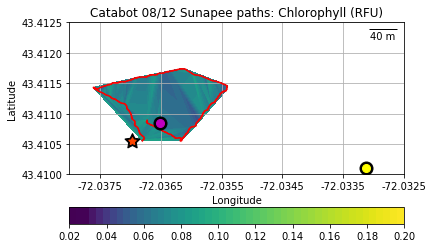

In [2]:
degree_sign= u'\N{DEGREE SIGN}'

CSV_FILE_PATH = '../../../../Data/ISER2021/Sunapee-20200812-path-3.csv'
#CSV_FILE_PATH2 = '../../../../Data/ISER2021/Sunapee-20200715-path-2.csv'
#CSV_FILE_PATH3 = '../../../../Data/ISER2021/Sunapee-20200715-path-3.csv'

with open(CSV_FILE_PATH, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path1_list = np.array(list(reader))

'''
with open(CSV_FILE_PATH2, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path2_list = np.array(list(reader))
    
with open(CSV_FILE_PATH3, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path3_list = np.array(list(reader))
'''
#=============================== 07/15 ===============================

# one independent

z = path1_list[0:702,29]
z = z.astype('float32')

# gps x,y
x = path1_list[0:702,2]
x = x.astype('float32')
y = path1_list[0:702,1]
y = y.astype('float32')

"""
# PATH 1
# temp 23
# chloro 29
z1 = path1_list[0:2126,29]
z1 = z1.astype('float32')

# gps x,y
x1 = path1_list[0:2126,2]
x1 = x1.astype('float32')
y1 = path1_list[0:2126,1]
y1 = y1.astype('float32')

## PATH 2
# chloro 29
z2 = path2_list[0:998,29]
z2 = z2.astype('float32')

# gps x,y
x2 = path2_list[0:998,2]
x2 = x2.astype('float32')
y2 = path2_list[0:998,1]
y2 = y2.astype('float32')

## PATH 3
# chloro 29
z3 = path3_list[0:597,29]
z3 = z3.astype('float32')

# gps x,y
x3 = path3_list[0:597,2]
x3 = x3.astype('float32')
y3 = path3_list[0:597,1]
y3 = y3.astype('float32')

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
z = np.concatenate([z1, z2, z3])
"""
#=====================================================================

f, ax = plt.subplots()
#ax.set_title('Catabot 07/15 Sunapee path 1: Temperature (' + degree_sign + 'C)')
ax.set_title('Catabot 08/12 Sunapee paths: Chlorophyll (RFU)')

vmax=0.20
vmin=0.02
levels = np.linspace(vmin,vmax, 50) # original 20

cs = ax.tricontourf(x,y,z, 10, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03), levels=levels,vmax=vmax,vmin=vmin)
#cs = ax.tricontourf(x,y,z, 20, vmin=24.35, vmax=26.94)
#cs = ax.tricontourf(x,y,z, 20)

cb_ticklabel = np.linspace(vmin, vmax, 10)
cb = f.colorbar(cs, ticks=cb_ticklabel, orientation='horizontal', format='%.2f')

ax.set_xlabel('Longitude')
plt.xlim([-72.038, -72.0325])
ax.set_xticks(np.arange(-72.0375, -72.0324, 0.001))
f.canvas.draw()
ax.set_xticklabels(['-72.0375', '-72.0365', '-72.0355', '-72.0345', '-72.0335', '-72.0325'])

ax.set_ylabel('Latitude')
plt.ylim([43.4095, 43.4120])
ax.set_yticks(np.arange(43.4095, 43.4121, 0.0005))
f.canvas.draw()
ax.set_yticklabels(['43.4100', '43.4105', '43.4110', '43.4115', '43.4120', '43.4125'])

# path 1,2,3
#ax.plot(x,y,marker='o', color='k', markersize=0.1)
#ax.plot(x,y,marker='o', color='b', markersize=0.1)
ax.plot(x,y,marker='o', color='r', markersize=0.1)

ax.set_aspect('equal')
plt.grid(True)

# summer buoy
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='yellow', marker='o', markersize=8)

# boathouse
ax.plot(np.array([-72.0369625]), np.array([43.4100466]), color='k', marker=(5,1), markersize=16)
ax.plot(np.array([-72.0369625]), np.array([43.4100466]), color='#FF4500', marker=(5,1), markersize=8)

# winter buoy
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='m', marker='o', markersize=8)

bar = AnchoredSizeBar(ax.transData, 0.00046, '40 m', 'upper right', pad=0.6, frameon=False)
ax.add_artist(bar)
plt.show()
f.savefig('0812-path-onlyone-path-red.png', bbox_inches ='tight')

# to save only color bar
#ax.remove()
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')
#cb.ax.tick_params(labelsize=14)
#cb.set_label(label='Temperature (' + degree_sign + 'C)', size=14)


#plt.show()


In [3]:
min(z)

0.032387704

In [4]:
max(z)

0.09690103